# NLP Summarization

Using the sumy package, we test various types of summarization techniques then summarize our wine data.

In [1]:
import pandas as pd
import sumy
import datetime as dt

%matplotlib inline

In [2]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer 
from sumy.summarizers.luhn import LuhnSummarizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

LANGUAGE = "english"
SENTENCES_COUNT = 1

## Evaluate the two data files

In [5]:
# Read in data file 1
df = pd.read_csv('winemag-data_first150k.csv',encoding='Latin-1')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum SelecciÃ³n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen RodrÃ­guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La BÃ©gude, named af...",La BrÃ»lade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la BÃ©gude


In [6]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [7]:
# Read in data file 2
df2 = pd.read_csv('winemag-data-130k-v2.csv',encoding='Latin-1')
df2.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin OâKeefe,@kerinokeefe,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [8]:
df2.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [8]:
# Look at a single description
df.loc[0,'description']

'This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022â\x80\x932030.'

In [9]:
# How many rows of each variety do we have?
df2['variety'].value_counts().head(15)

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
RosÃ©                        3564
Merlot                       3102
Nebbiolo                     2804
Zinfandel                    2714
Sangiovese                   2707
Malbec                       2652
Portuguese Red               2466
Name: variety, dtype: int64

In [10]:
# How many rows of each variety do we have?
df['variety'].value_counts().head(45)

Chardonnay                       14482
Pinot Noir                       14291
Cabernet Sauvignon               12800
Red Blend                        10062
Bordeaux-style Red Blend          7347
Sauvignon Blanc                   6320
Syrah                             5825
Riesling                          5524
Merlot                            5070
Zinfandel                         3799
Sangiovese                        3345
Malbec                            3208
White Blend                       2824
RosÃ©                             2817
Tempranillo                       2556
Nebbiolo                          2241
Portuguese Red                    2216
Sparkling Blend                   2004
Shiraz                            1970
Corvina, Rondinella, Molinara     1682
RhÃ´ne-style Red Blend            1505
Pinot Gris                        1365
Barbera                           1365
Cabernet Franc                    1363
Sangiovese Grosso                 1346
Pinot Grigio             

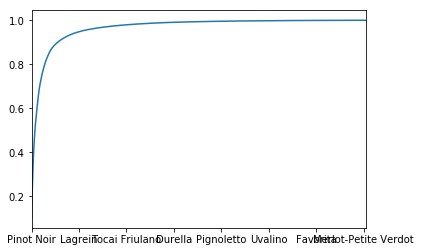

In [18]:
# Get a sense of what fraction of the varieties we need to get 90% coverage of the data
(df2['variety'].value_counts().cumsum()/df2['variety'].value_counts().sum()).plot()

In [11]:
# How many varieties = 90% in df?
varperc = df['variety'].value_counts().cumsum()/df['variety'].value_counts().sum()
trimvarperc = varperc[varperc < 0.9]
print(len(trimvarperc))
trimvarperc.index

50


Index(['Chardonnay', 'Pinot Noir', 'Cabernet Sauvignon', 'Red Blend',
       'Bordeaux-style Red Blend', 'Sauvignon Blanc', 'Syrah', 'Riesling',
       'Merlot', 'Zinfandel', 'Sangiovese', 'Malbec', 'White Blend', 'RosÃ©',
       'Tempranillo', 'Nebbiolo', 'Portuguese Red', 'Sparkling Blend',
       'Shiraz', 'Corvina, Rondinella, Molinara', 'RhÃ´ne-style Red Blend',
       'Pinot Gris', 'Barbera', 'Cabernet Franc', 'Sangiovese Grosso',
       'Pinot Grigio', 'Viognier', 'Bordeaux-style White Blend',
       'Champagne Blend', 'Port', 'GrÃ¼ner Veltliner', 'GewÃ¼rztraminer',
       'Portuguese White', 'Petite Sirah', 'CarmenÃ¨re', 'Tempranillo Blend',
       'Chenin Blanc', 'Glera', 'Grenache', 'Prosecco', 'AlbariÃ±o', 'Gamay',
       'Pinot Blanc', 'Nero d'Avola', 'Moscato', 'RhÃ´ne-style White Blend',
       'Garganega', 'Garnacha', 'TorrontÃ©s', 'Dolcetto'],
      dtype='object')

In [12]:
# How many varieties = 90% in df2?
varperc = df2['variety'].value_counts().cumsum()/df2['variety'].value_counts().sum()
trimvarperc = varperc[varperc < 0.9]
print(len(trimvarperc))
trimvarperc.index

56


Index(['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend',
       'Bordeaux-style Red Blend', 'Riesling', 'Sauvignon Blanc', 'Syrah',
       'RosÃ©', 'Merlot', 'Nebbiolo', 'Zinfandel', 'Sangiovese', 'Malbec',
       'Portuguese Red', 'White Blend', 'Sparkling Blend', 'Tempranillo',
       'RhÃ´ne-style Red Blend', 'Pinot Gris', 'Champagne Blend',
       'Cabernet Franc', 'GrÃ¼ner Veltliner', 'Portuguese White',
       'Bordeaux-style White Blend', 'Pinot Grigio', 'Gamay',
       'GewÃ¼rztraminer', 'Viognier', 'Shiraz', 'Petite Sirah',
       'Sangiovese Grosso', 'Barbera', 'Glera', 'Port', 'Grenache',
       'Corvina, Rondinella, Molinara', 'Chenin Blanc', 'Tempranillo Blend',
       'CarmenÃ¨re', 'AlbariÃ±o', 'Pinot Blanc', 'RhÃ´ne-style White Blend',
       'Nero d'Avola', 'Aglianico', 'Moscato', 'Garnacha', 'Sauvignon',
       'Verdejo', 'Melon', 'Garganega', 'Petit Verdot', 'Meritage',
       'TorrontÃ©s', 'Prosecco', 'Vermentino'],
      dtype='object')

In [13]:
# Combine the descriptions for every row into one big string per variety
df_trim = df[df['variety'].isin(trimvarperc.index)]

def joinf(x):
    return ' '.join(x['description'])

var_desc = df_trim.groupby('variety').apply(joinf)

In [14]:
var_desc[0]

"Dried cranberry and currant flavors with raisin-plum cake undertones define this light-bodied wine that's mildly tannic, tart, simple and easy to like. Forest floor, leather, tilled soil, ripe berry and balsam are some of the aromas you'll find in this delicious red. The smooth, dense palate delivers blackberry jam, espresso, licorice and ground pepper flavors, blanketed with soft, silky tannins. Tobacco and graphite notes linger on the finish. Drink through 2020. Undergrowth, truffle, black-skinned berry and exotic spice aromas meld with balsamic notes. Rounded and chewy, the palate doles out fleshy black cherry, blackberry extract, cinnamon, licorice and chopped mint flavors, enveloped in velvety tannins. A hint of carob closes the finish. Drink through 2024. Ripe plum, forest floor, truffle and dark spice aromas lead the nose. The delicious, enveloping palate doles out fleshy blackberry, juicy black cherry, cinnamon and licorice flavors while an earthy hint of game lends character.

In [15]:
var_desc.index

Index(['Aglianico', 'AlbariÃ±o', 'Barbera', 'Bordeaux-style Red Blend',
       'Bordeaux-style White Blend', 'Cabernet Franc', 'Cabernet Sauvignon',
       'CarmenÃ¨re', 'Champagne Blend', 'Chardonnay', 'Chenin Blanc',
       'Corvina, Rondinella, Molinara', 'Gamay', 'Garganega', 'Garnacha',
       'GewÃ¼rztraminer', 'Glera', 'Grenache', 'GrÃ¼ner Veltliner', 'Malbec',
       'Melon', 'Meritage', 'Merlot', 'Moscato', 'Nebbiolo', 'Nero d'Avola',
       'Petit Verdot', 'Petite Sirah', 'Pinot Blanc', 'Pinot Grigio',
       'Pinot Gris', 'Pinot Noir', 'Port', 'Portuguese Red',
       'Portuguese White', 'Prosecco', 'Red Blend', 'RhÃ´ne-style Red Blend',
       'RhÃ´ne-style White Blend', 'Riesling', 'RosÃ©', 'Sangiovese',
       'Sangiovese Grosso', 'Sauvignon', 'Sauvignon Blanc', 'Shiraz',
       'Sparkling Blend', 'Syrah', 'Tempranillo', 'Tempranillo Blend',
       'TorrontÃ©s', 'Verdejo', 'Vermentino', 'Viognier', 'White Blend',
       'Zinfandel'],
      dtype='object', name='variety')

# Try different summarizers

Try the different built in summarizers to get a feel for how they differ.  Select one that seems to give best results.

In [16]:
st = dt.datetime.now()
print(st)
summarizer = LexRankSummarizer()

text = var_desc['Moscato']

#parser = PlaintextParser.from_file(file, Tokenizer(“english”))
parser = PlaintextParser(text, Tokenizer("english"))

summ_moscato = summarizer(parser.document,2)

for sentence in summ_moscato:
    print(sentence)
    
print(dt.datetime.now()-st)

2018-05-24 18:33:20.085043
The texture is soft and the finish very sweet.
It's a light dessert wine with good acidity.
0:00:22.350211


In [79]:
st = dt.datetime.now()
print(st)
summarizer_1 = LuhnSummarizer()

text = var_desc['Moscato']

#parser = PlaintextParser.from_file(file, Tokenizer(“english”))
parser = PlaintextParser(text, Tokenizer("english"))

summ_moscato = summarizer_1(parser.document,2)

for sentence in summ_moscato:
    print(sentence)
    
print(dt.datetime.now()-st)

2018-04-28 13:41:07.378695
Packaged in a bright blue bottle, this fresh Moscato d'Asti delivers soft aromas of peach and white flower followed by a spicy touch of crisp acidity that you can really feel at the back of the tongue.
The nose offers up just a bit of intrigue, with gardenia, musk and white rose scents, but the focus of this wine is really its core of baked apricot flavors that turn just a bit jammy on the finish.
0:00:00.828988


In [80]:
st = dt.datetime.now()
print(st)
summarizer_2 = LsaSummarizer()

text = var_desc['Moscato']

#parser = PlaintextParser.from_file(file, Tokenizer(“english”))
parser = PlaintextParser(text, Tokenizer("english"))

summ_moscato = summarizer_2(parser.document,2)

for sentence in summ_moscato:
    print(sentence)
    
print(dt.datetime.now()-st)

2018-04-28 13:42:57.614464
Fragrant, fresh and very typical of the Moscato aromatic variety, this is an approachable sweet wine in a round, squat bottle that would look pretty on any dinner table.
Fragrant, fresh and very typical of the Moscato aromatic variety, this is an approachable sweet wine in a round, squat bottle that would look pretty on any dinner table.
0:00:05.484926


In [81]:
st = dt.datetime.now()
print(st)
summarizer_3 = TextRankSummarizer()

text = var_desc['Moscato']

#parser = PlaintextParser.from_file(file, Tokenizer(“english”))
parser = PlaintextParser(text, Tokenizer("english"))

summ_moscato = summarizer_3(parser.document,2)

for sentence in summ_moscato:
    print(sentence)
    
print(dt.datetime.now()-st)

2018-04-28 13:44:05.290300
Moscato d'Asti makes a light and fragrant dessert wine with floral aromas back by freshly cut grass and soapy tones of lavender and scented candle.
Moscato d'Asti makes a light and fragrant dessert wine with floral aromas back by freshly cut grass and soapy tones of lavender and scented candle.
0:00:48.717939


# Try different varieties

Run this loop to get a summary for all the varieties in the dataset.   
___Beware this will take a really long time to run!!!___

In [ ]:
summ = []
for var in var_desc.index:
    text = var_desc[var]
    parser = PlaintextParser(text,Tokenizer("english"))
    summ.append(summarizer(parser.document,2))